### Machine Learning Unsupervised

#### Table of Content

### 1. Importing libraries and data

### 2. The elbow technique

### 3. k-means clustering

## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = '/Users/henning/Projects/Hotel_Booking'

In [5]:
h1 = pd.read_csv(os.path.join(path, 'Data', 'Raw', 'h1.csv'))

In [6]:
h1.shape

(40060, 31)

In [7]:
h1.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2. The elbow technique

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
# including only columns about booking
h1_int = h1[['ArrivalDateWeekNumber', 'Adults', 'Children', 'PreviousBookingsNotCanceled', 'PreviousCancellations', 'BookingChanges', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']]

In [10]:
score = [kmeans[i].fit(h1_int).score(h1_int) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-8049326.635721407,
 -2339447.5065246234,
 -1169169.9414109918,
 -731981.6140125969,
 -555985.201634598,
 -439691.68186540593,
 -373832.67501827003,
 -309660.28621390765,
 -271735.97081944917]

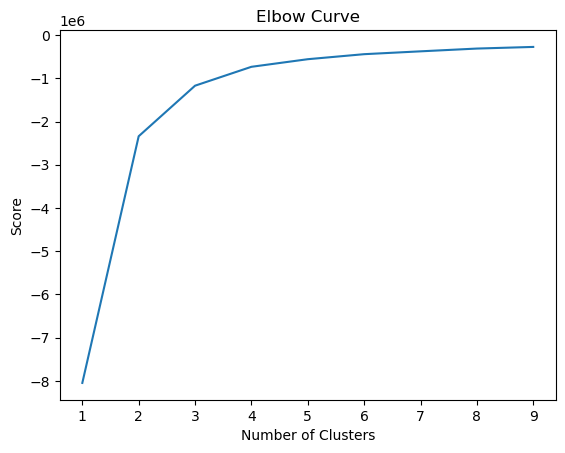

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(h1_int)

KMeans(n_clusters=3)

In [14]:
h1_int['clusters'] = kmeans.fit_predict(h1_int)

In [15]:
h1_int.head()

,ArrivalDateWeekNumber,Adults,Children,PreviousBookingsNotCanceled,PreviousCancellations,BookingChanges,RequiredCarParkingSpaces,TotalOfSpecialRequests,clusters
0,27,2,0,0,0,3,0,0,2
1,27,2,0,0,0,4,0,0,2
2,27,1,0,0,0,0,0,0,2
3,27,1,0,0,0,0,0,0,2
4,27,2,0,0,0,0,0,1,2


In [16]:
h1_int['clusters'].value_counts()

clusters
2    15436
1    13360
0    11264
Name: count, dtype: int64

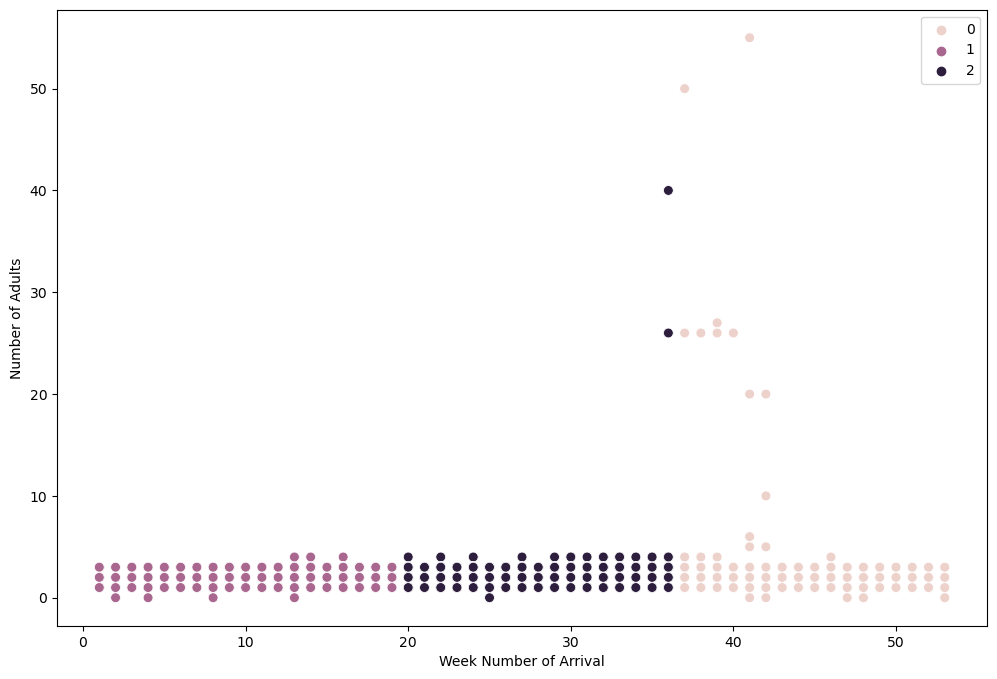

In [17]:
# Plot the clusters for the "ArrivalDateWeekNumber" and "Adults" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=h1_int['ArrivalDateWeekNumber'], y=h1_int['Adults'], hue=kmeans.labels_, s=50) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Week Number of Arrival')
plt.ylabel('Number of Adults')
plt.show()

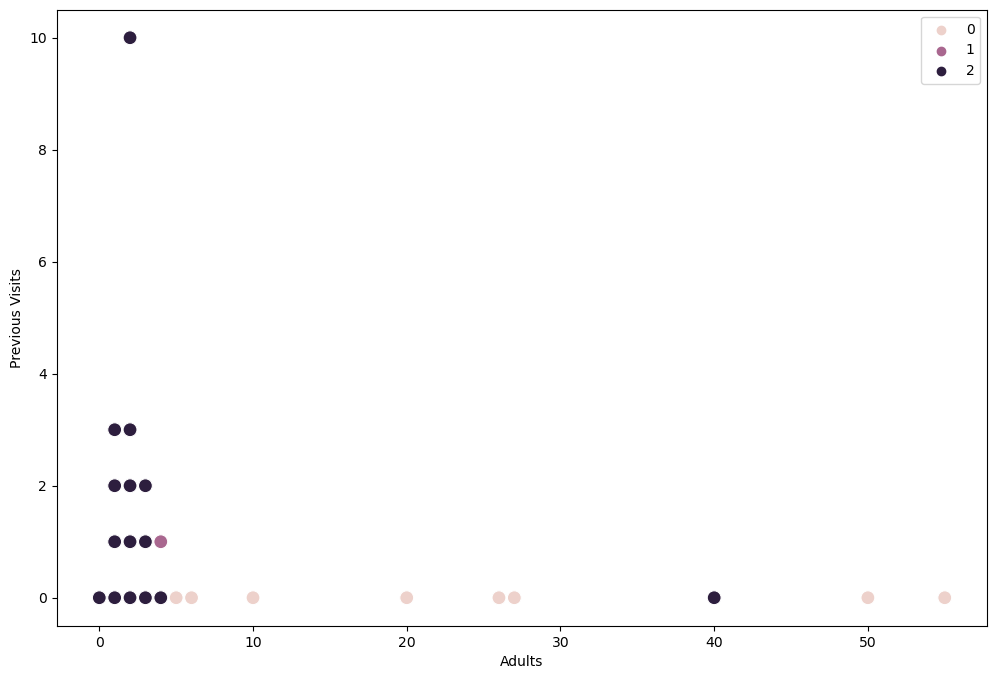

In [18]:
# Plot the clusters for the "PreviousBookingsNotCanceled" and "PreviousCancellations" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=h1_int['Adults'], y=h1_int['Children'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Adults') 
plt.ylabel('Previous Visits')
plt.show()

## Discuss how and why the clusters make sense

overall, the clustering doesn't make much sense. While the clustering sorts the 3 groups according to the week number -> sorting the year into 3 sections, analyzing the other variables based on this sorting do not result in useful insights.

In [22]:
h1_int.loc[h1_int['clusters'] == 2, 'cluster'] = 'dark purple'
h1_int.loc[h1_int['clusters'] == 1, 'cluster'] = 'purple'
h1_int.loc[h1_int['clusters'] == 0, 'cluster'] = 'pink'

In [23]:
h1_int.groupby('cluster').agg({'ArrivalDateWeekNumber':['mean', 'median'], 
                                'Adults':['mean', 'median'], 
                                'Children':['mean', 'median'],
                                'PreviousBookingsNotCanceled':['mean', 'median'],
                               'PreviousCancellations':['mean', 'median'],
                               'BookingChanges':['mean', 'median'],
                               'RequiredCarParkingSpaces':['mean', 'median'],
                               'TotalOfSpecialRequests':['mean', 'median'],
                              }) 	

ArrivalDateWeekNumber           Adults         Children         \
                             mean median      mean median      mean median   
cluster                                                                      
dark purple             28.487562   29.0  1.976030    2.0  0.208538    0.0   
pink                    44.439009   44.0  1.832653    2.0  0.071112    0.0   
purple                  11.000599   11.0  1.770434    2.0  0.084955    0.0   

            PreviousBookingsNotCanceled        PreviousCancellations         \
                                   mean median                  mean median   
cluster                                                                       
dark purple                    0.089013    0.0              0.116546    0.0   
pink                           0.117987    0.0              0.180842    0.0   
purple                         0.236826    0.0              0.017889    0.0   

            BookingChanges        RequiredCarParkingSpaces         \
                      mean median                     mean median   
cluster                                                             
dark purple       0.285242    0.0                 0.140062    0.0   
pink              0.298295    0.0                 0.142134    0.0   
purple            0.282410    0.0                 0.132335    0.0   

            TotalOfSpecialRequests         
                              mean median  
cluster                                    
dark purple               0.755118    1.0  
pink                      0.558150    0.0  
purple                    0.515344    0.0

Here we see, that the clusters are mostly based on the week number with three distinct centers (median: 29, 44, and 11), while the other descriptive statistics do not have clear distinctions.

## Propose what these results could be useful for in future steps of an analytics pipeline.

The next analysis should look into if we can see differences in the bookings based on when in the year the guest visits the resort hotel.

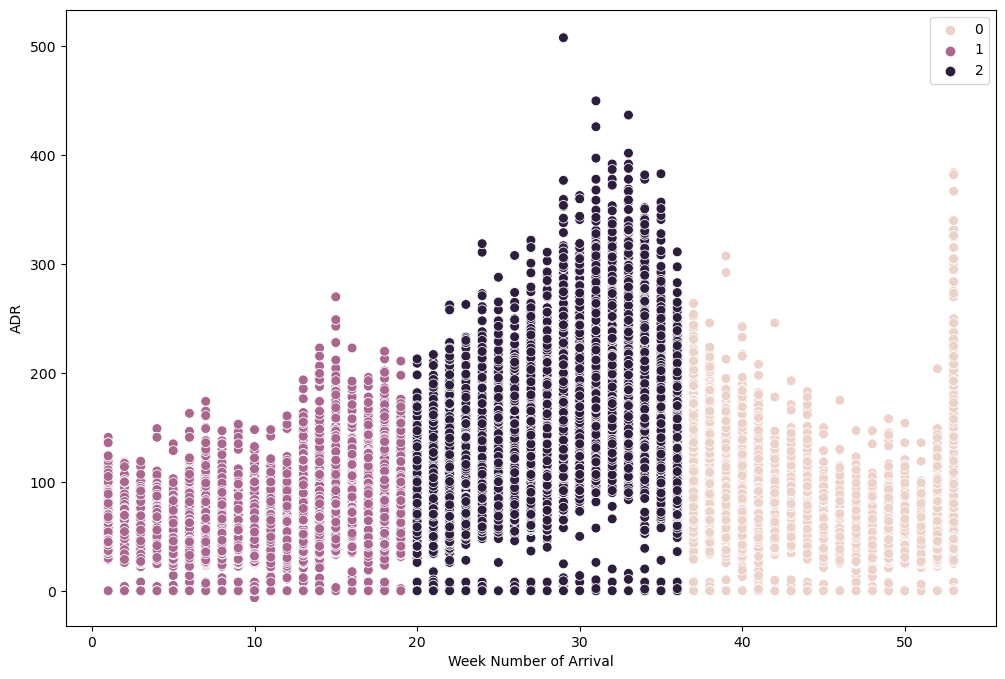

In [27]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=h1['ArrivalDateWeekNumber'], y=h1['ADR'], hue=kmeans.labels_, s=50) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Week Number of Arrival')
plt.ylabel('ADR')
plt.show()